# Southern California Single Unit Properties

In [92]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries for processing data
import pandas as pd
import numpy as np

#Import libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for obtaining data from SQL databse
import env
import os

#Library for statistical testing
from scipy import stats

#sklearn imports 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE


#
from acquire import wrangle_zillow
from prep import clean_data

## Acquire

In [2]:
zillow = wrangle_zillow()

In [3]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,3.0,2.0,1125.0,289445.0,1974.0,3490.16,6059.0
1,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0
2,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0
3,3.0,2.0,1766.0,810694.0,1980.0,9407.01,6037.0
4,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0


### Visualize Distributions

#### Distribution

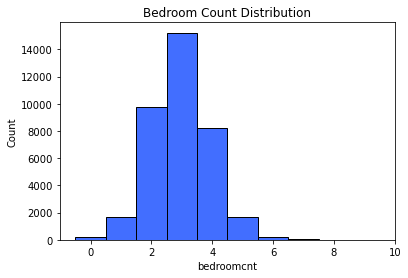

In [56]:
bedroom_count_distribution = sns.histplot(data=zillow, x="bedroomcnt", discrete = True).set(Title = "Bedroom Count Distribution")

#### Boxplot

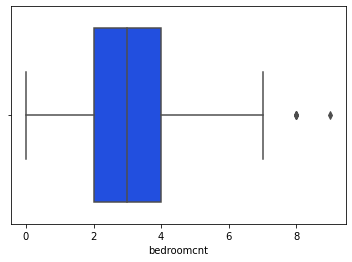

In [57]:
bedroom_count_boxplot = sns.boxplot(x=zillow["bedroomcnt"])

### Bathroom Count

#### Distribution

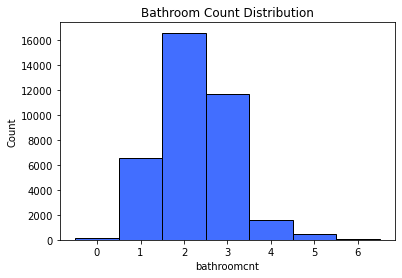

In [58]:
bathroom_count_distribution = sns.histplot(data=zillow, x="bathroomcnt", discrete = True).set(Title = "Bathroom Count Distribution")

#### Boxplot

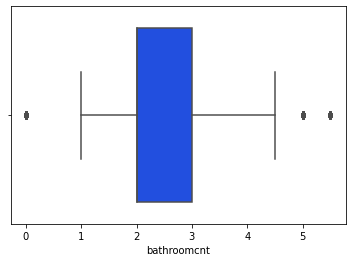

In [59]:
bathroom_count_boxplot = sns.boxplot(x=zillow["bathroomcnt"])

### Square Feet

#### Distribution

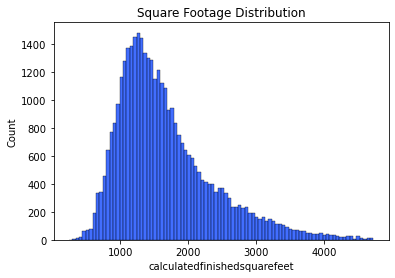

In [60]:
square_feet_distribution = sns.histplot(data=zillow, x="calculatedfinishedsquarefeet").set(Title = "Square Footage Distribution")

#### Boxplot

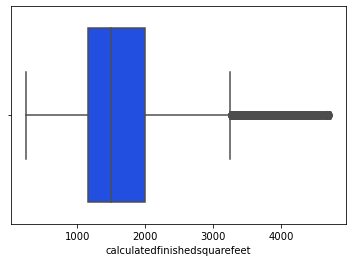

In [61]:
square_feet_boxplot = sns.boxplot(x=zillow["calculatedfinishedsquarefeet"])

### Tax Value

#### Distribution

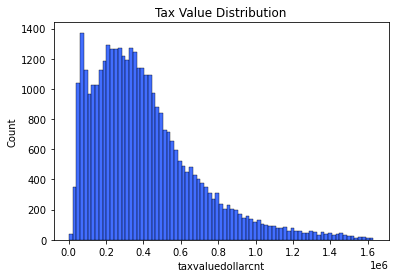

In [62]:
tax_value_distribution = sns.histplot(data = zillow, x = "taxvaluedollarcnt").set(Title = "Tax Value Distribution")

#### Boxplot

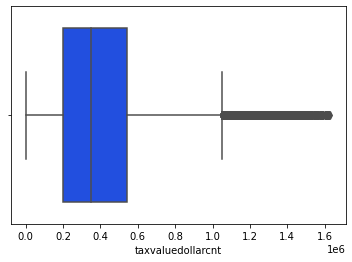

In [63]:
tax_value_boxplot = sns.boxplot(x=zillow["taxvaluedollarcnt"])

### Year Built

#### Distribution

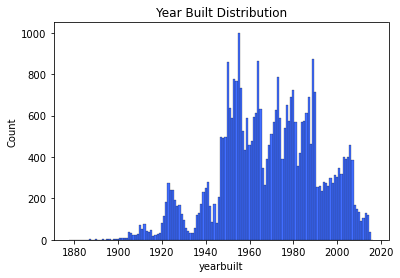

In [64]:
yearbuilt_graph = sns.histplot(data=zillow, x="yearbuilt", discrete = True).set(Title = "Year Built Distribution")

#### Boxplot

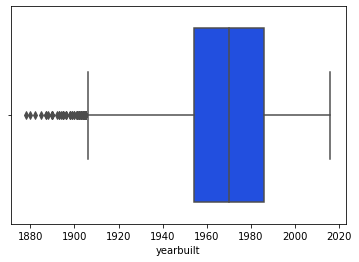

In [65]:
yearbuilt_boxplot = sns.boxplot(x=zillow["yearbuilt"])

### FIPS Code

### Countplot

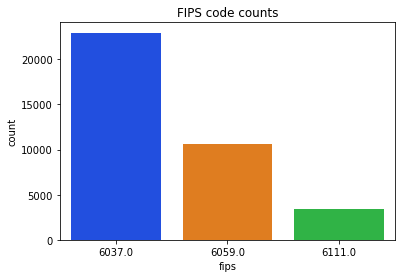

In [66]:
fips_graph = sns.countplot(data = zillow, x ="fips").set(Title = "FIPS code counts")

## Prepare

In [7]:
train, validate, test = clean_data(zillow)

In [9]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled
8266,4.0,2.0,1919.0,286663.0,2009.0,5219.87,6037.0,0.374276,0.444444,0.363636
18949,2.0,2.5,1258.0,64609.0,1978.0,803.16,6111.0,0.226928,0.222222,0.454545
22247,4.0,3.0,1657.0,210212.0,1987.0,3411.70,6037.0,0.315872,0.444444,0.545455
7526,2.0,3.0,1684.0,237037.0,1992.0,2984.05,6037.0,0.321890,0.222222,0.545455
17592,4.0,4.5,3932.0,1094525.0,2000.0,13409.66,6111.0,0.823005,0.444444,0.818182


## Data Exploration

### Pairplot

In [12]:
train_scaled = train.drop(columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'])

In [20]:
sns.set_palette("bright")

In [21]:
def plot_variable_pairs(df):
    g = sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
    return g

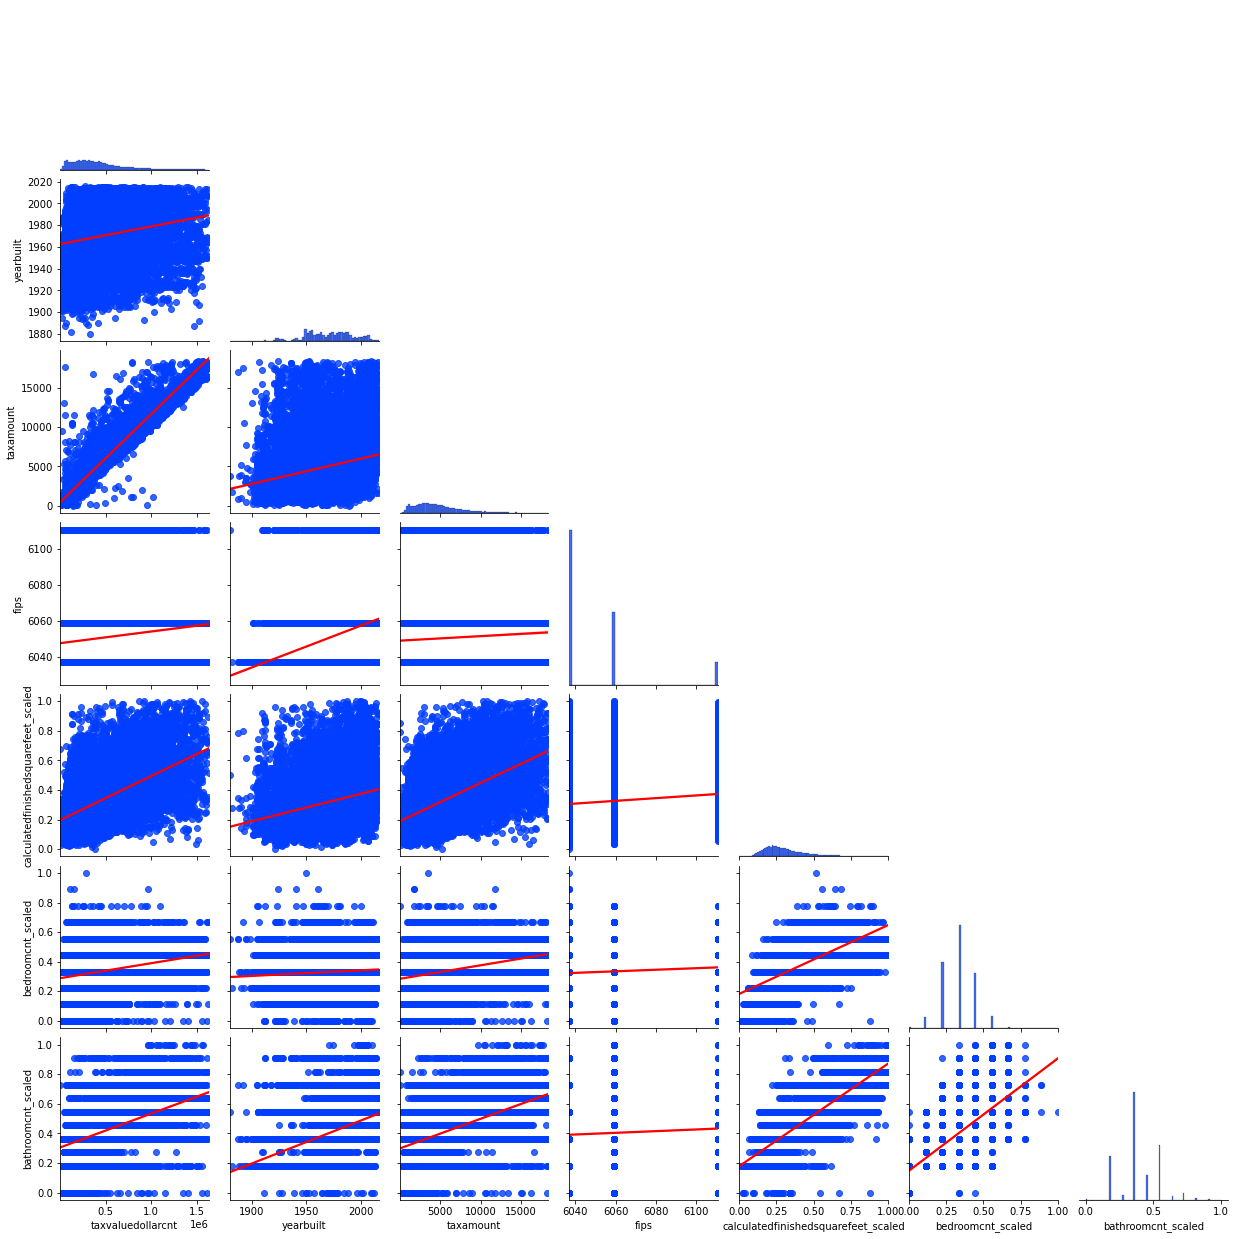

In [22]:
plot_variable_pairs(train_scaled)

## Plotting Categorical vs. Continuous Features

In [31]:
categorical = ['fips', 'yearbuilt']
continuous = ['bedroomcnt_scaled', 'bathroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled', 'taxvaluedollarcnt', 'taxamount']

In [32]:
def plot_categorical_and_continuous_vars(train_scaled, categorical, continuous):
    for col1 in categorical:
        for col2 in continuous:
            plt.figure(figsize=(22, 12))
            a = sns.swarmplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)
    for col1 in categorical:
        for col2 in continuous:
            plt.figure(figsize=(22, 12))        
            b = sns.stripplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)      
    for col1 in categorical:
        for col2 in continuous:
            plt.figure(figsize=(22, 12))
            c = sns.barplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)
    return a, b, c

(<AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>,
 <AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>,
 <AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>)

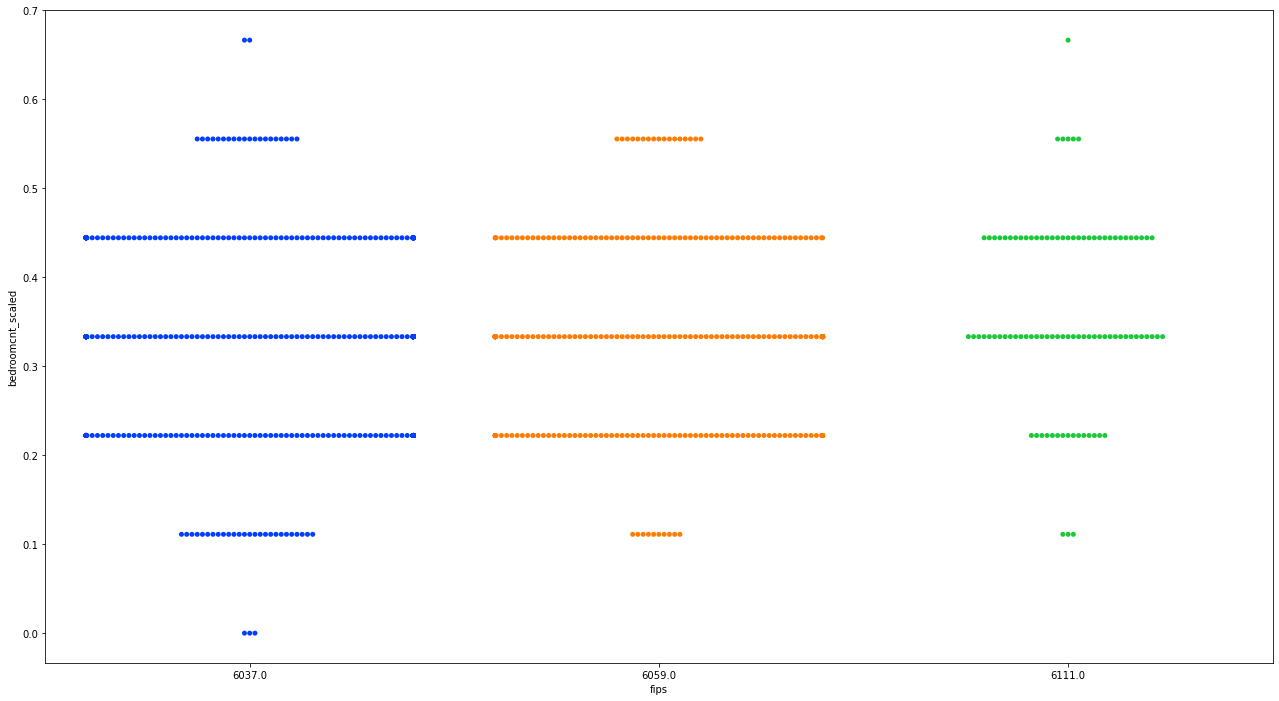

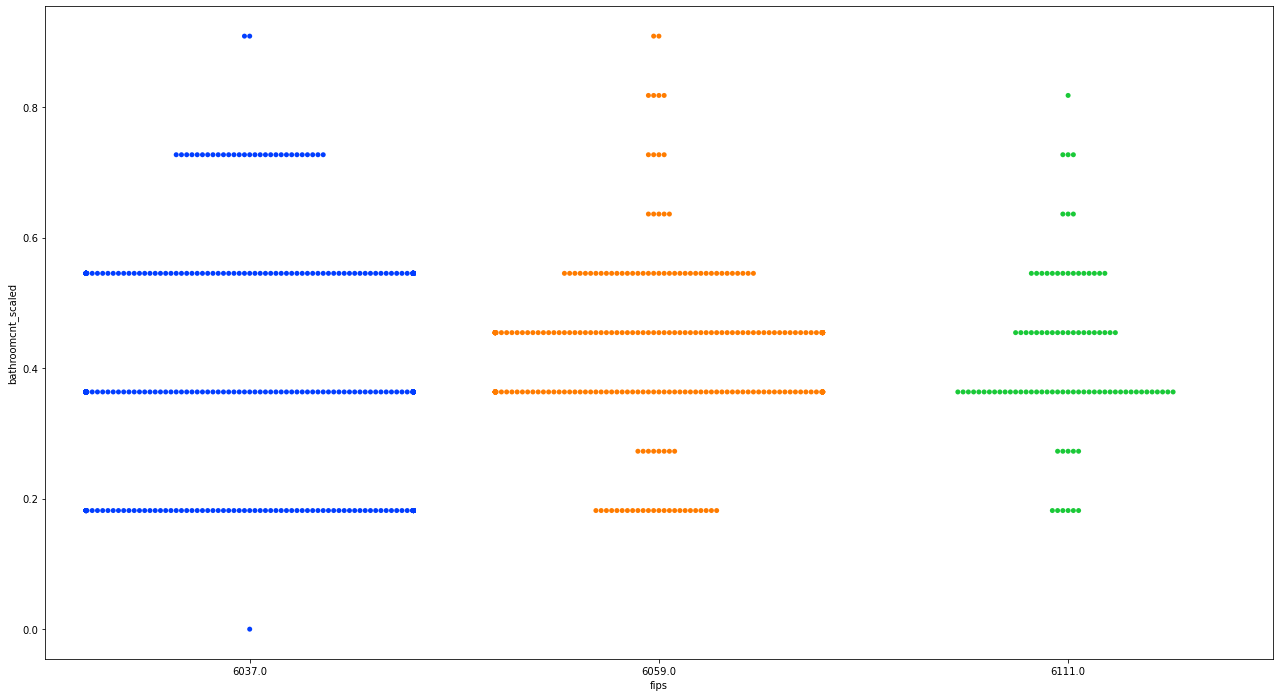

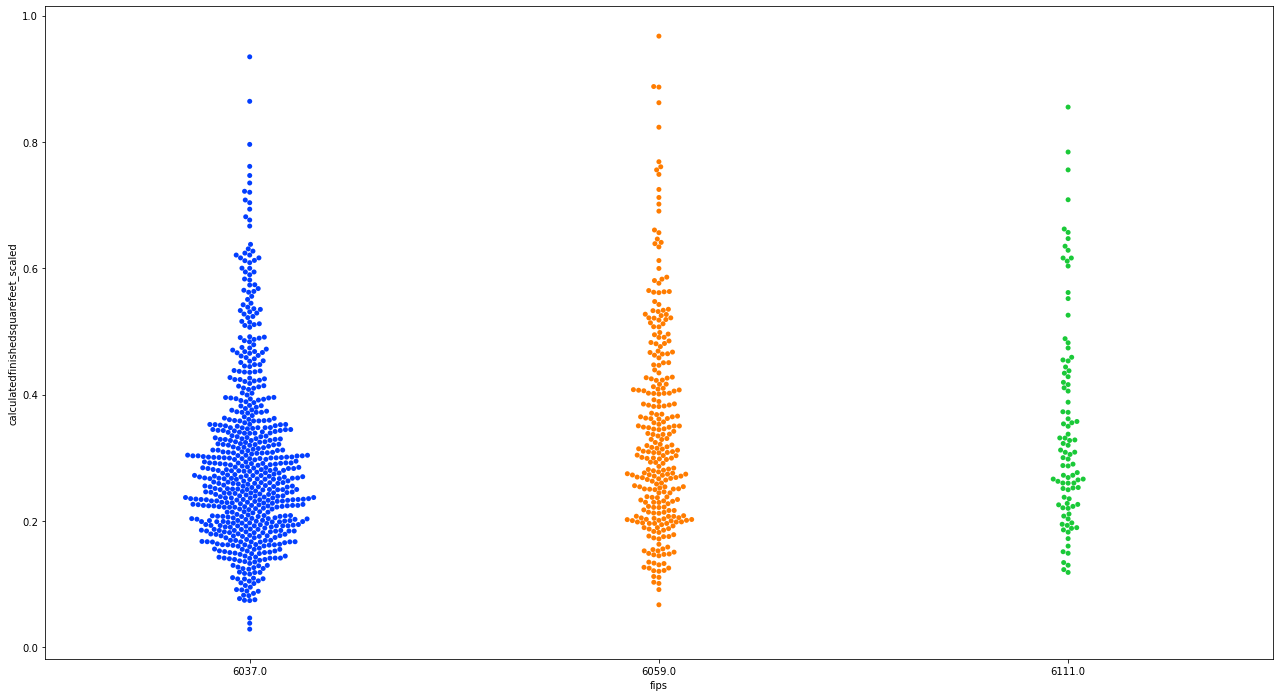

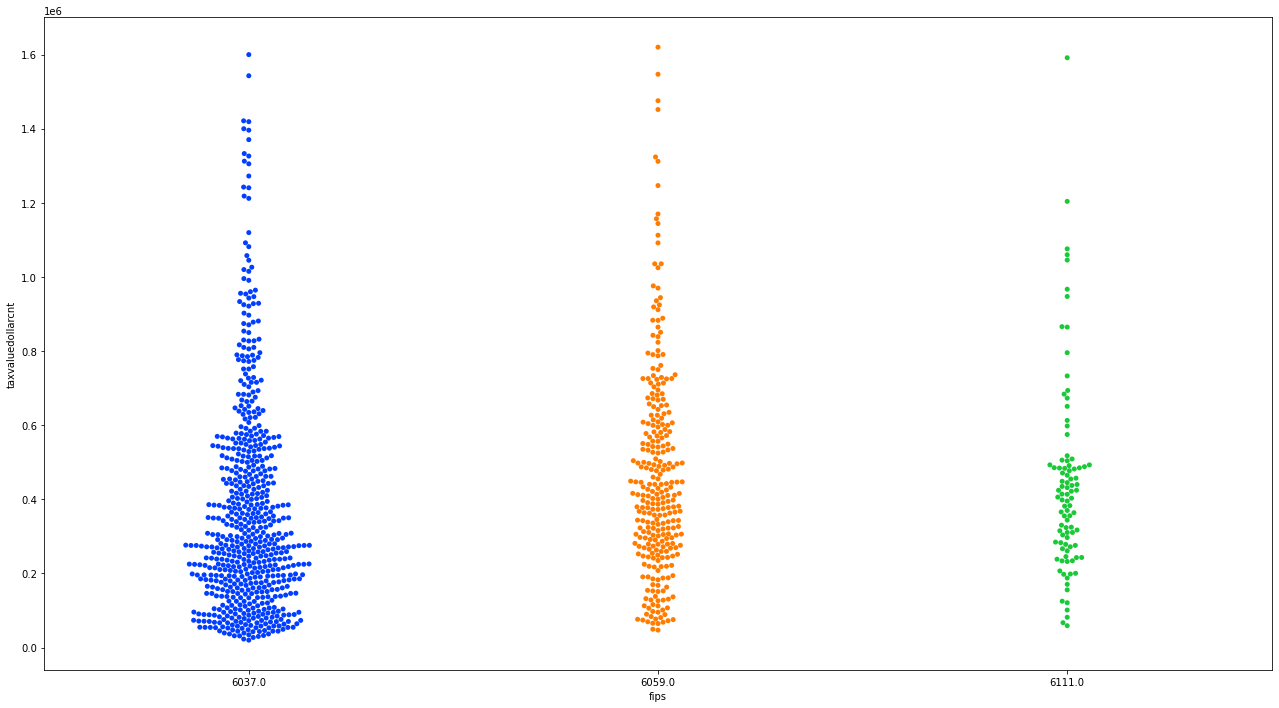

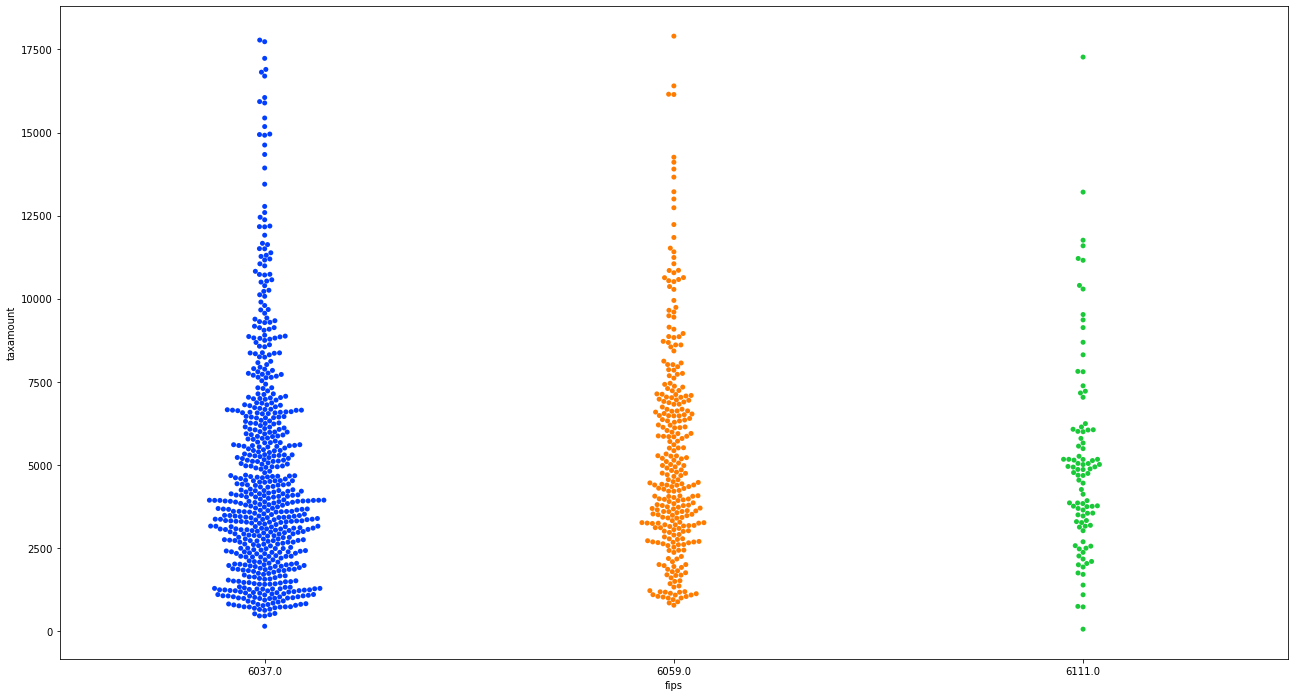

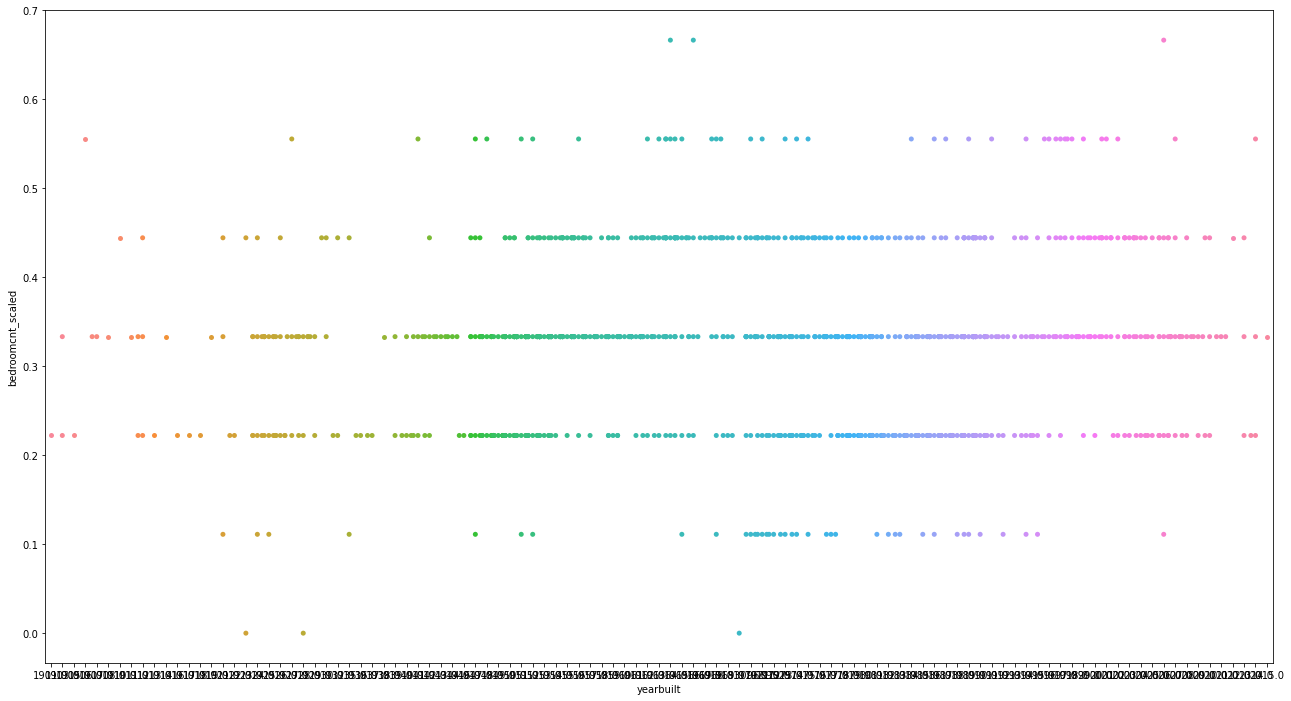

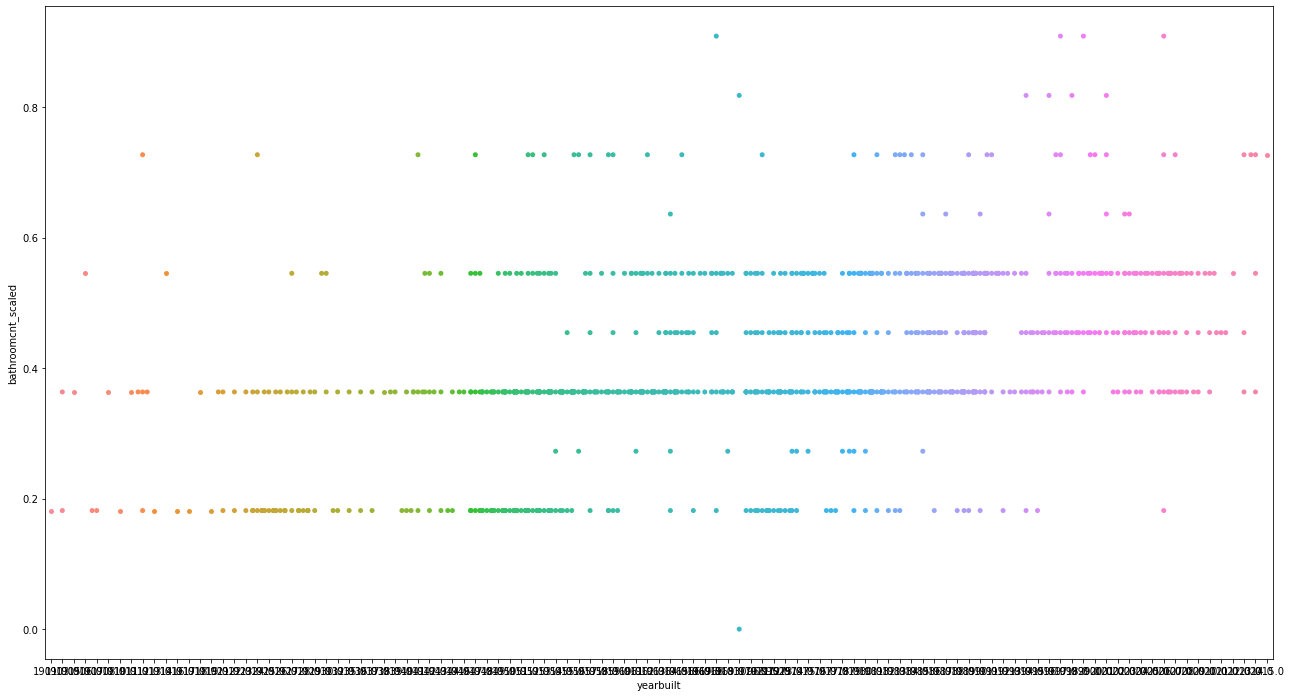

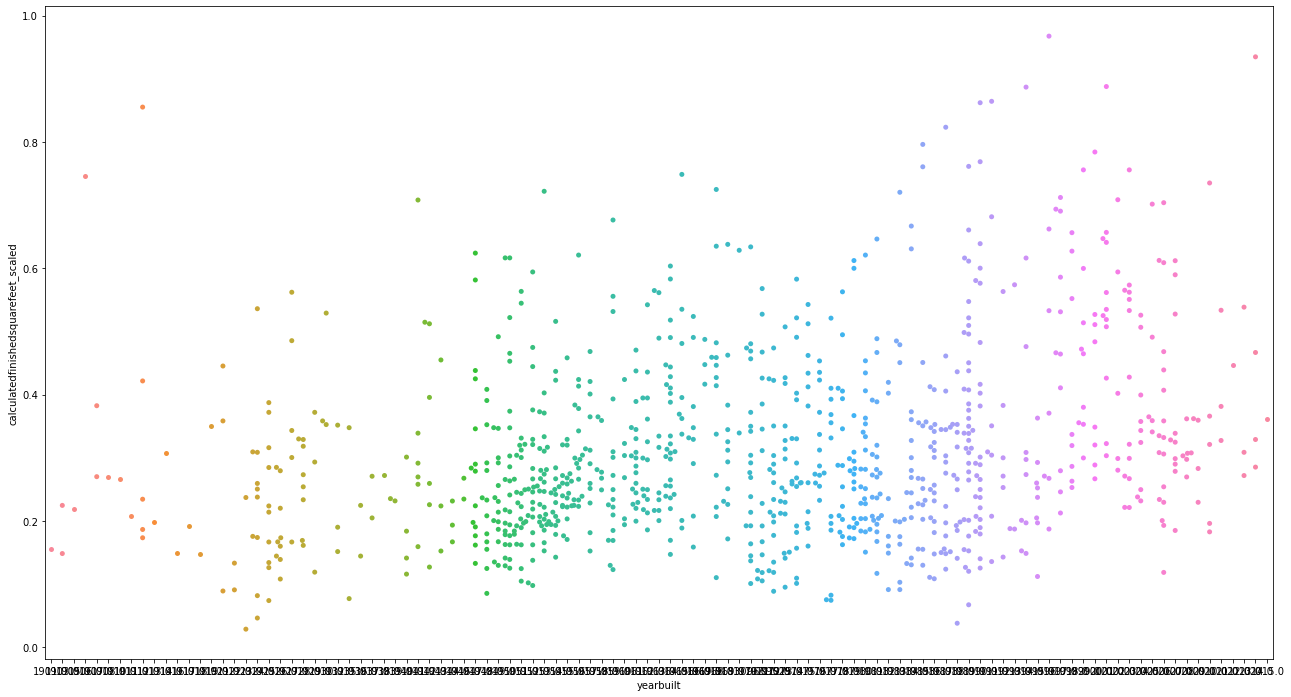

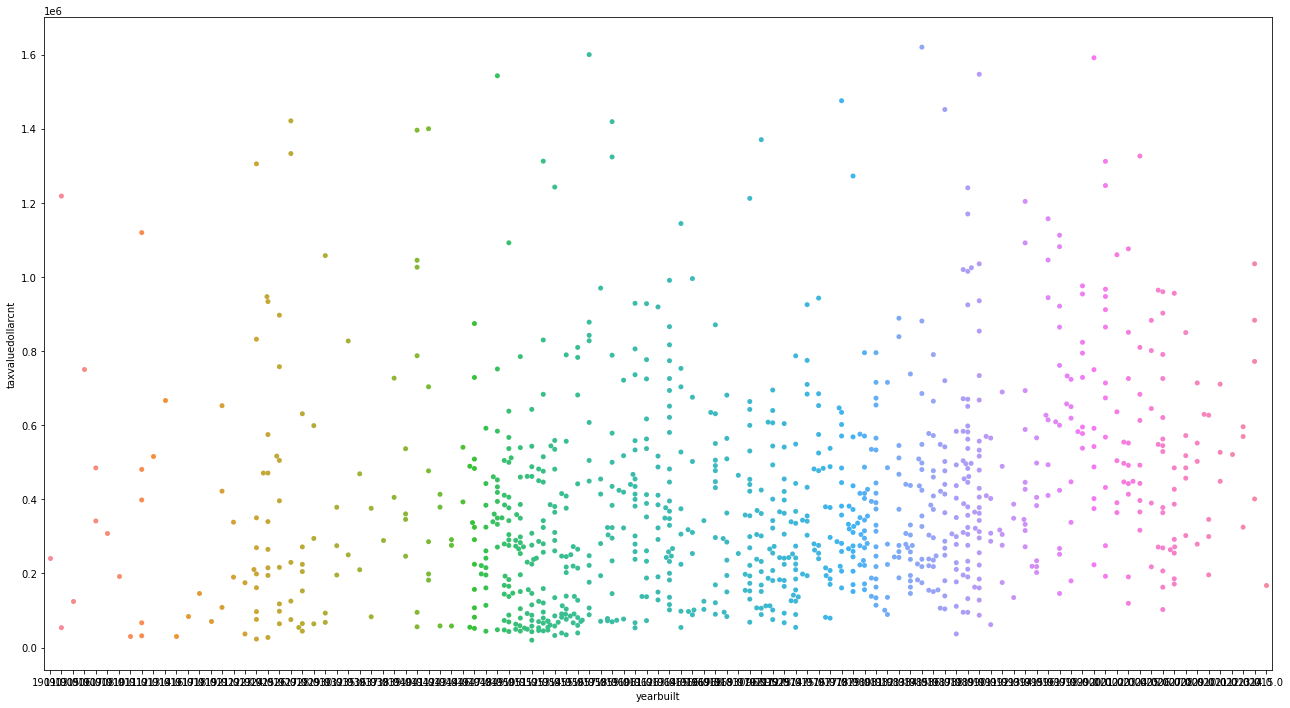

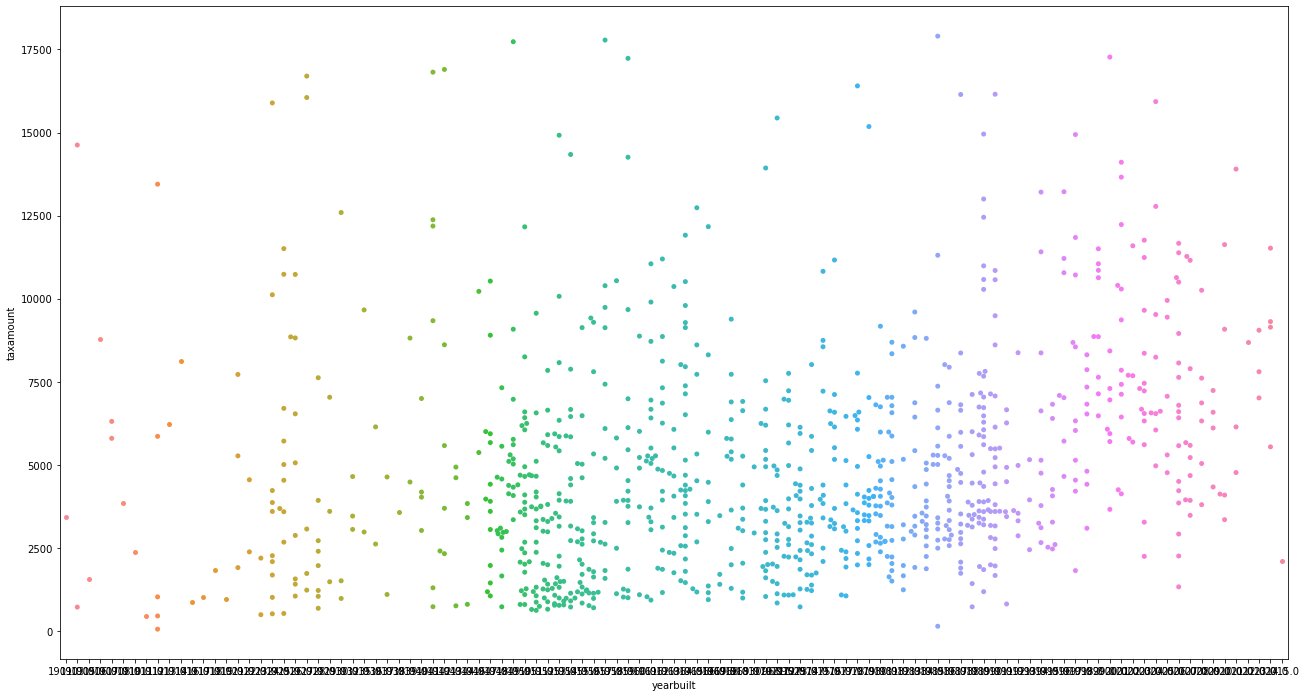

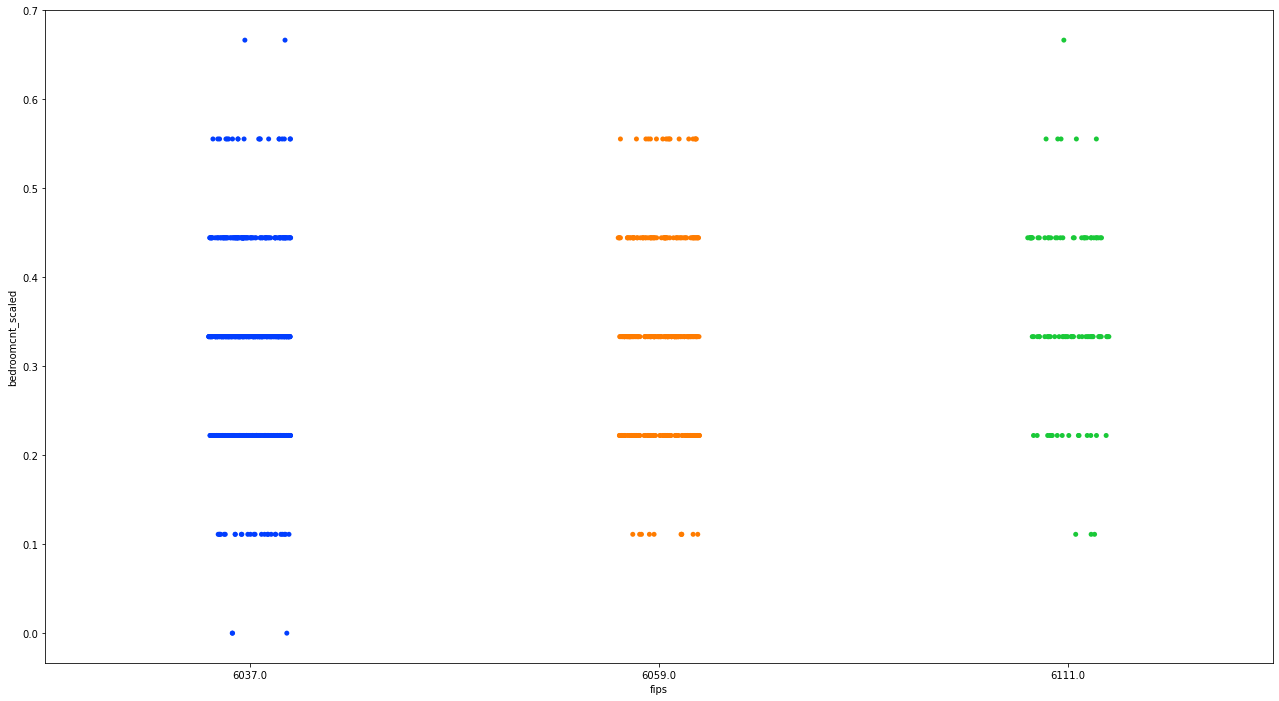

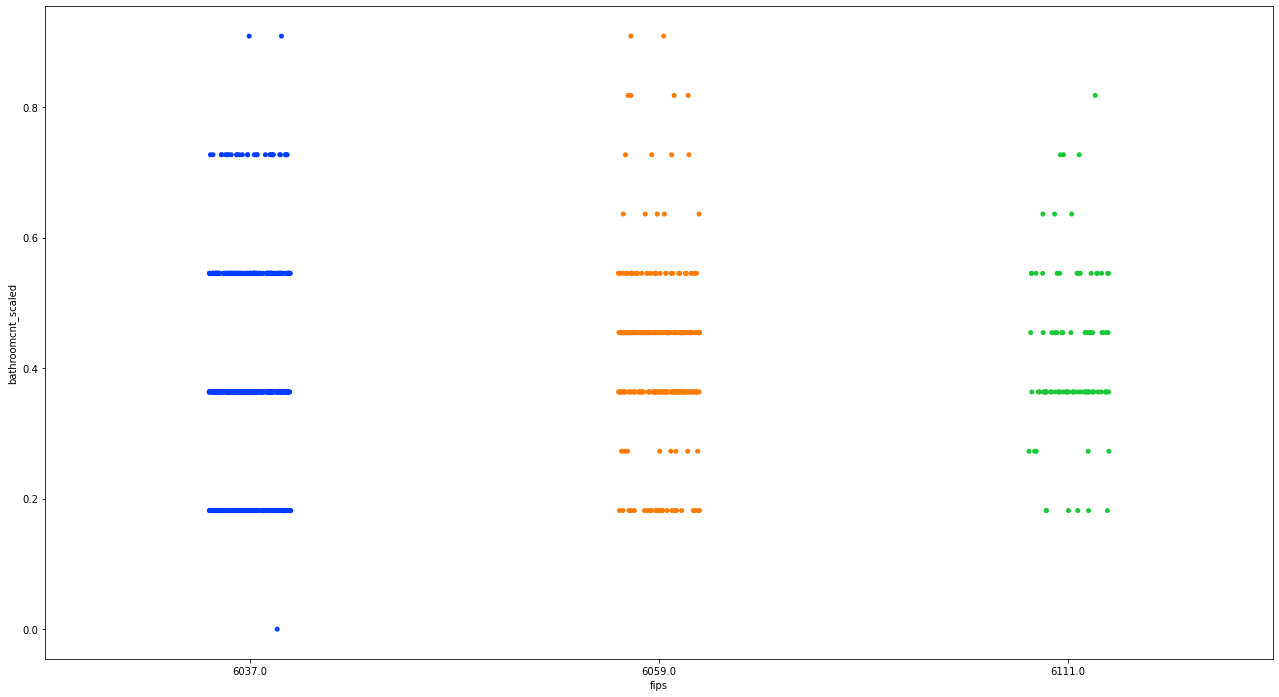

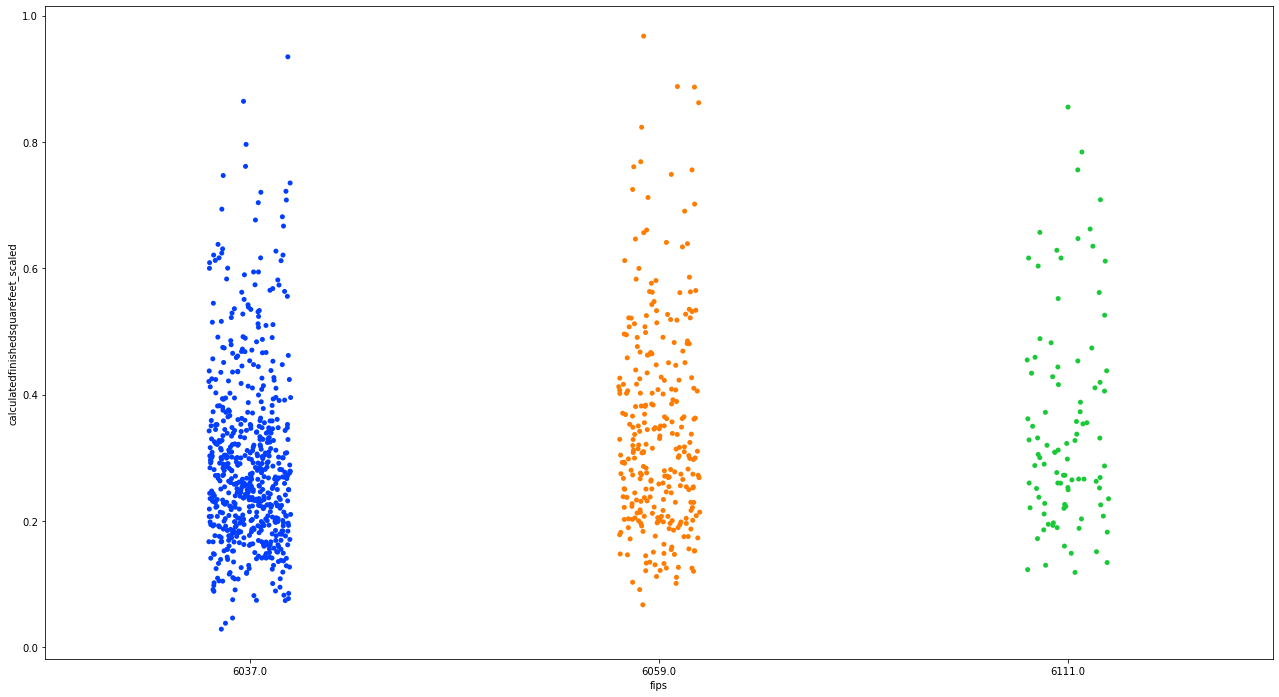

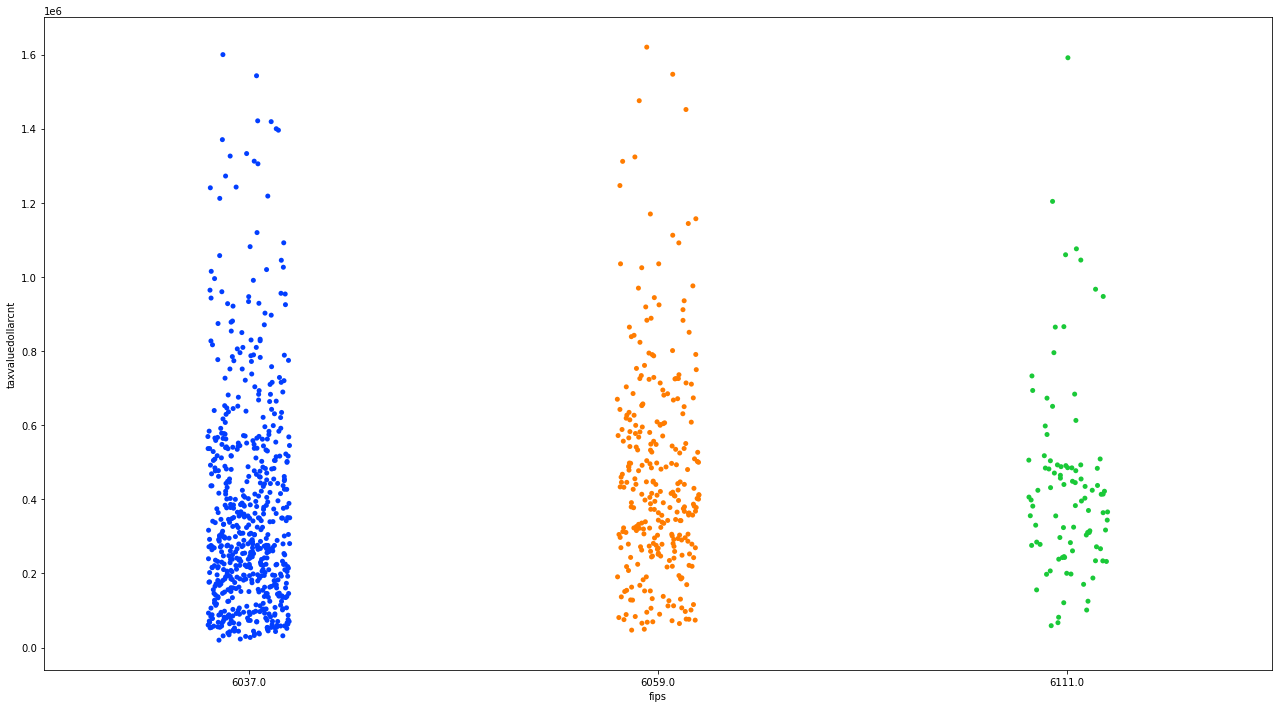

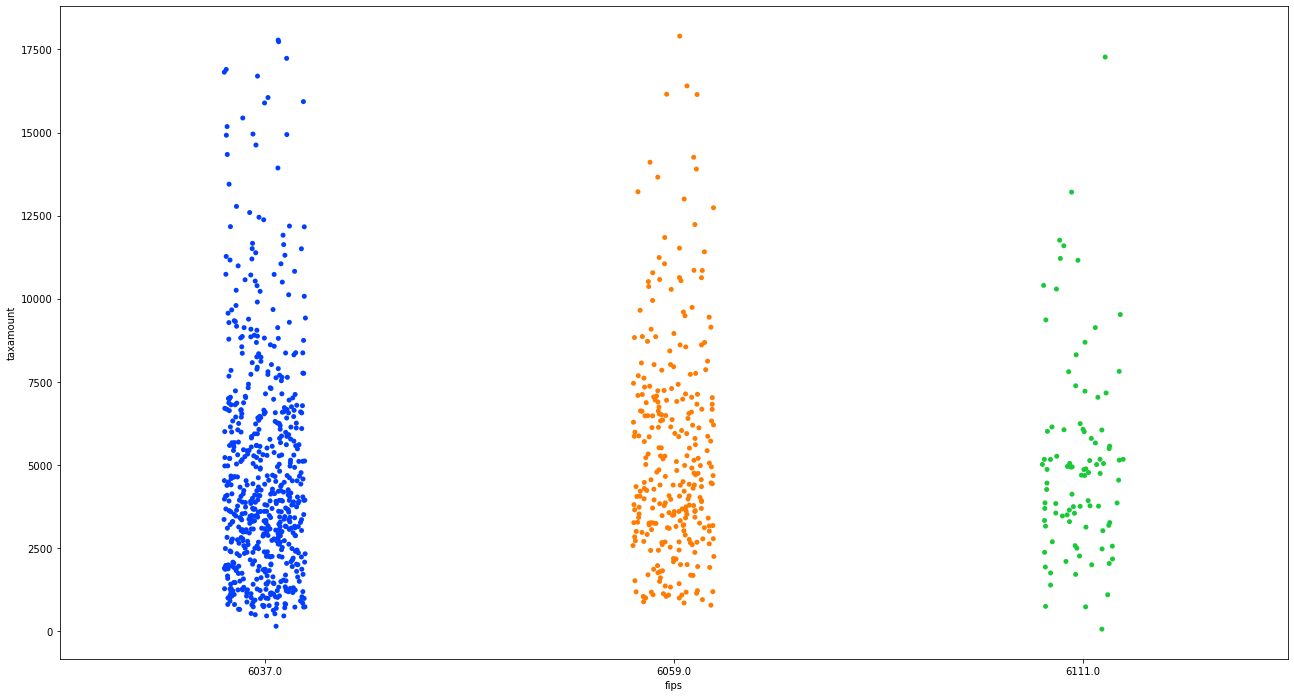

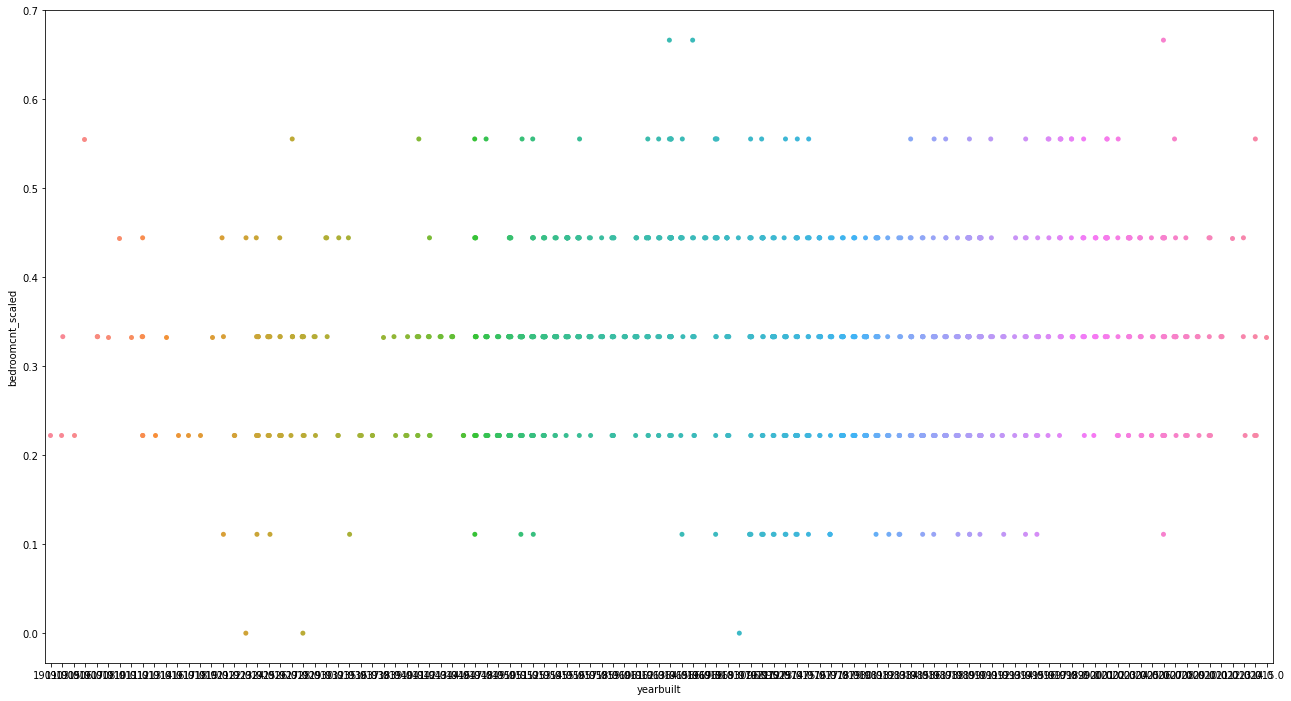

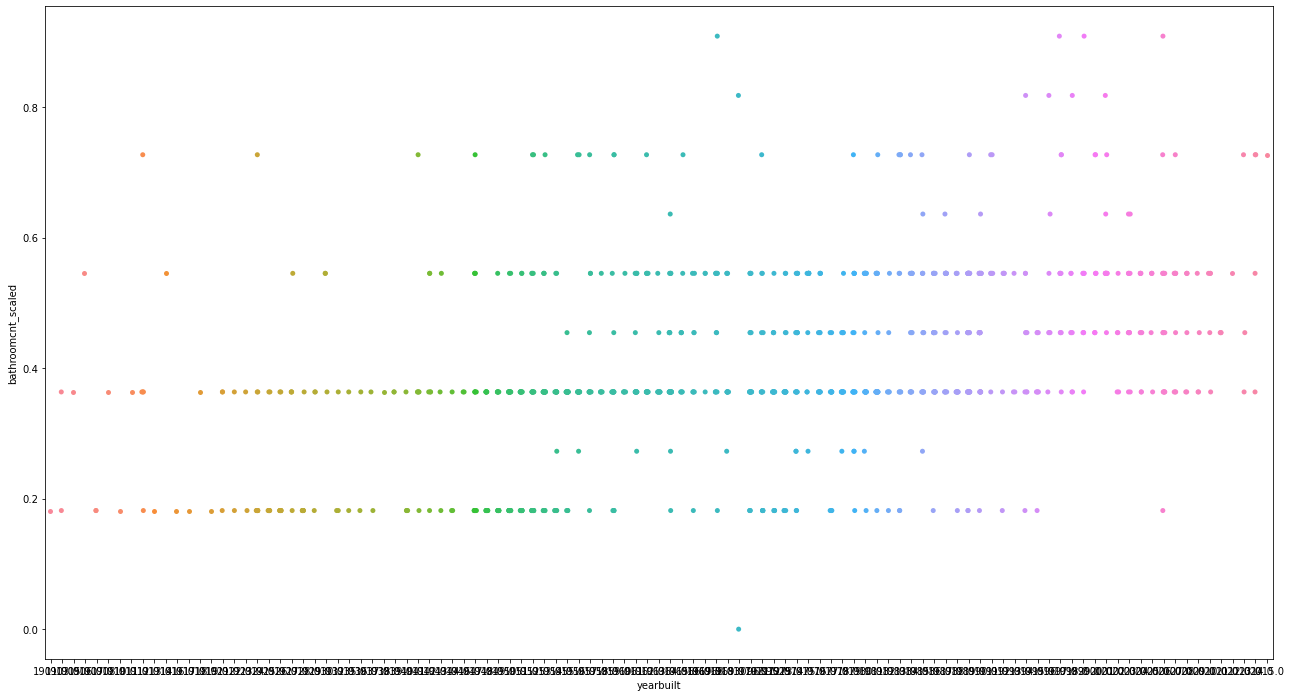

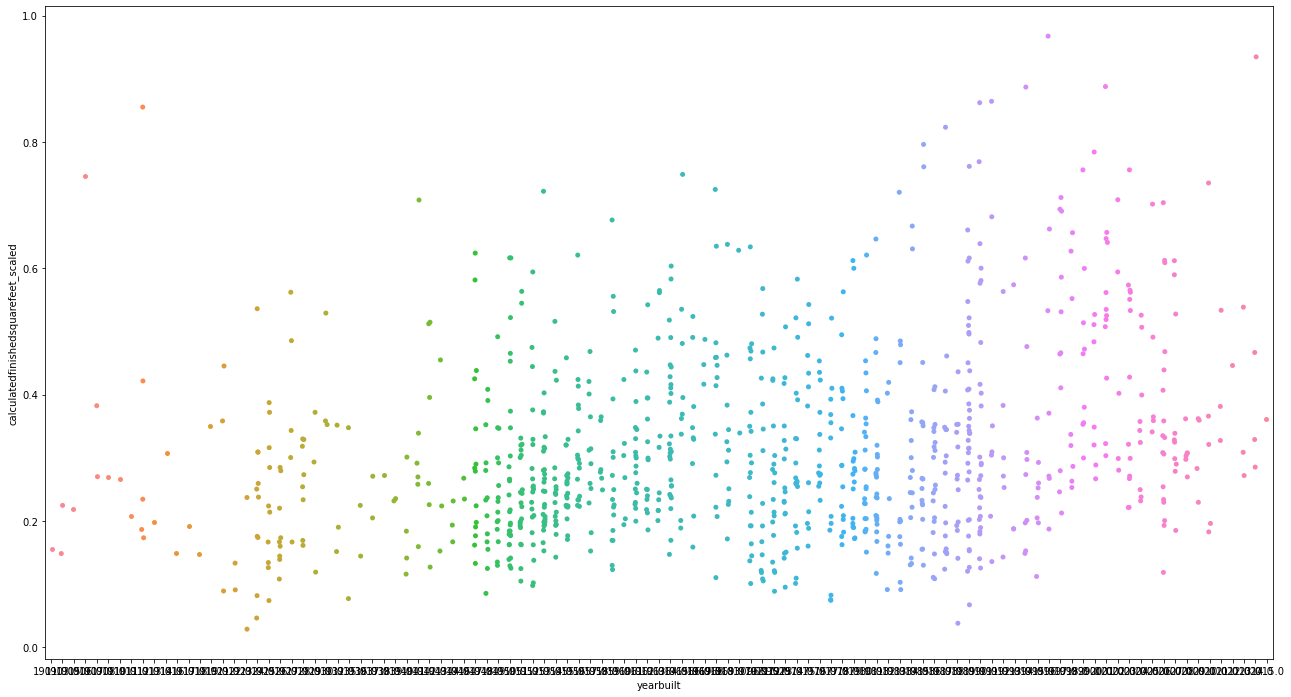

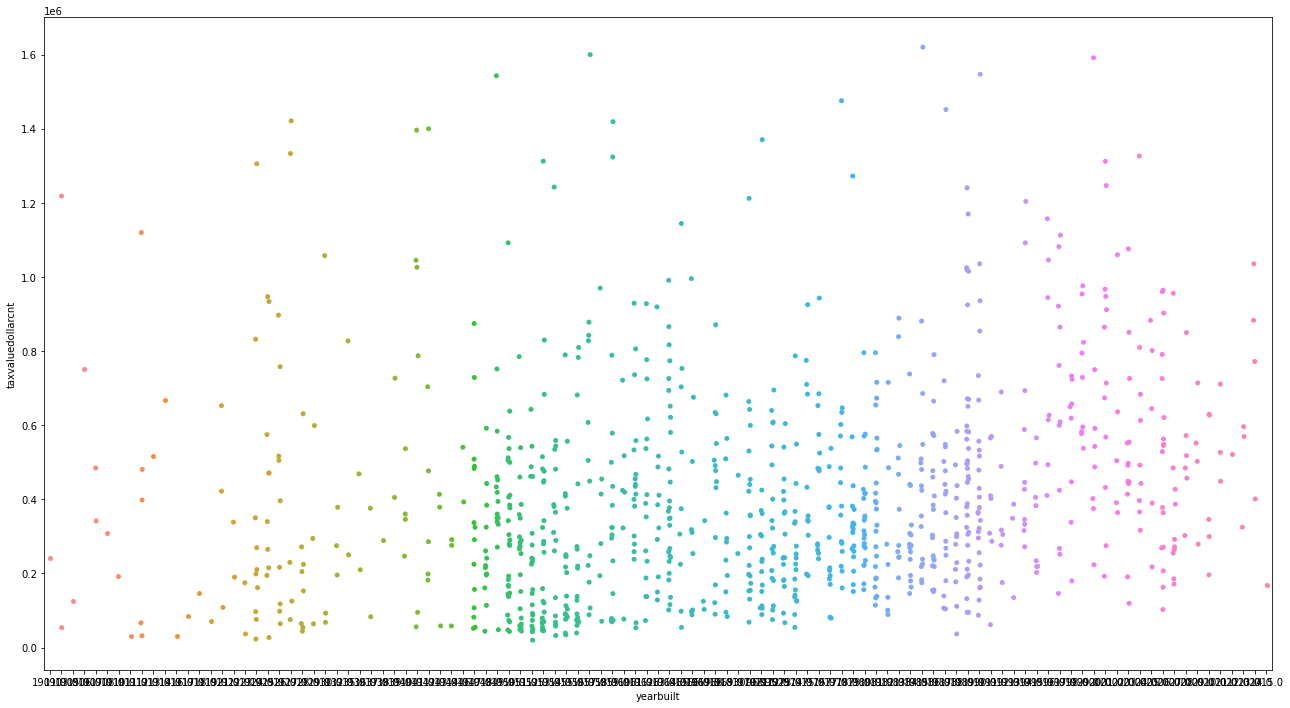

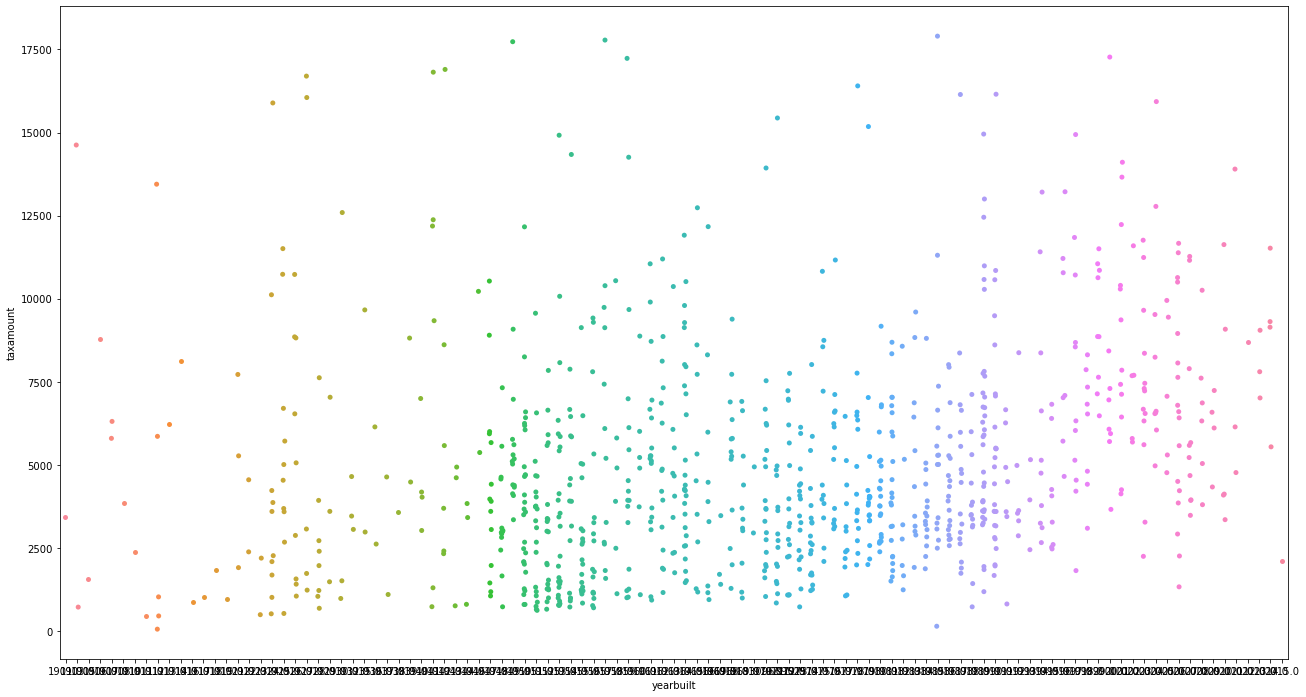

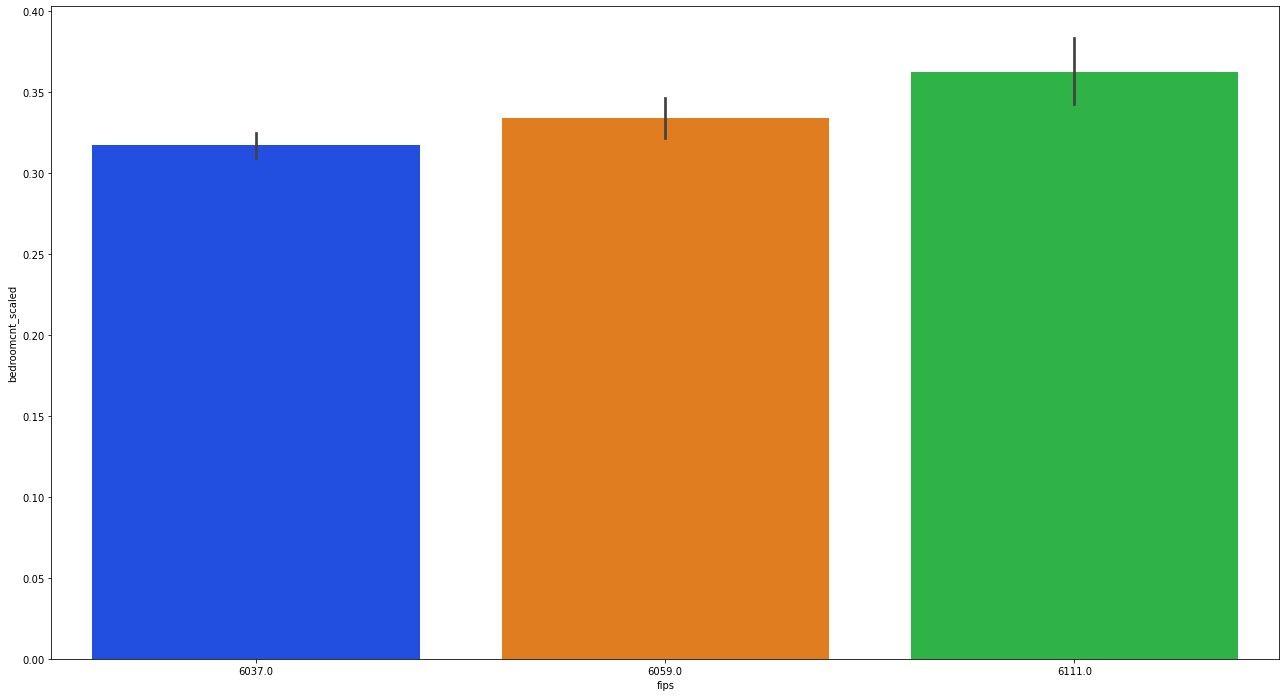

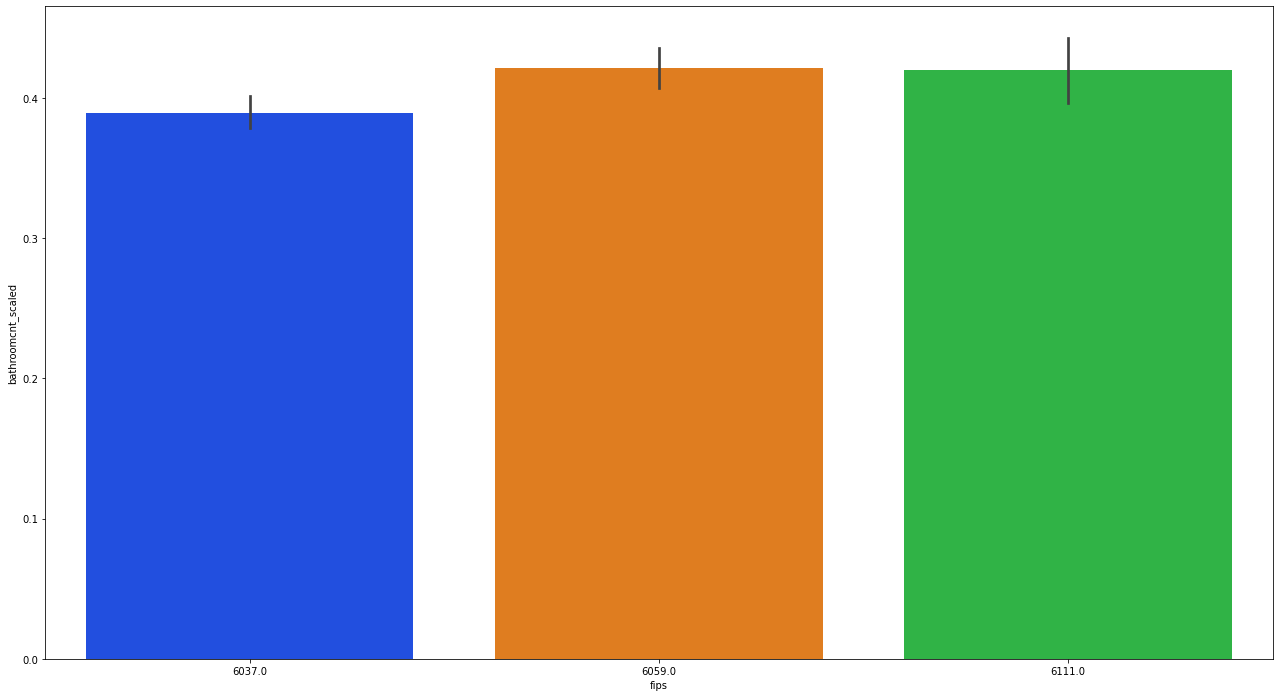

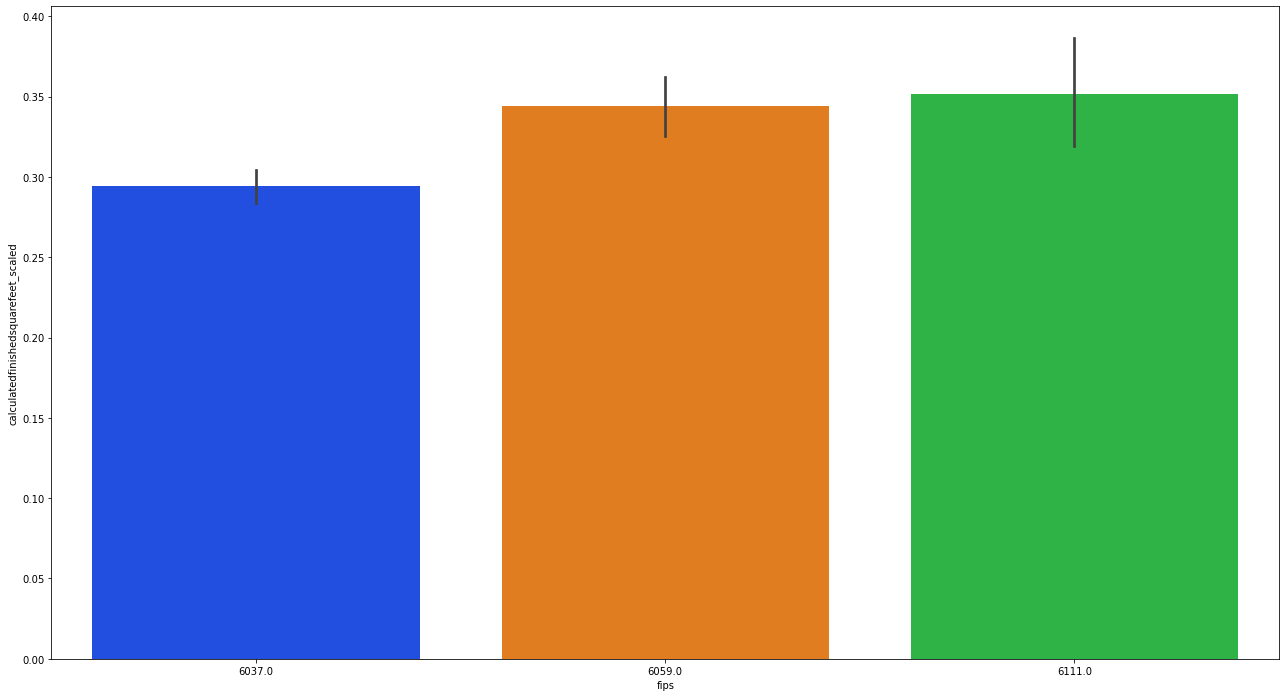

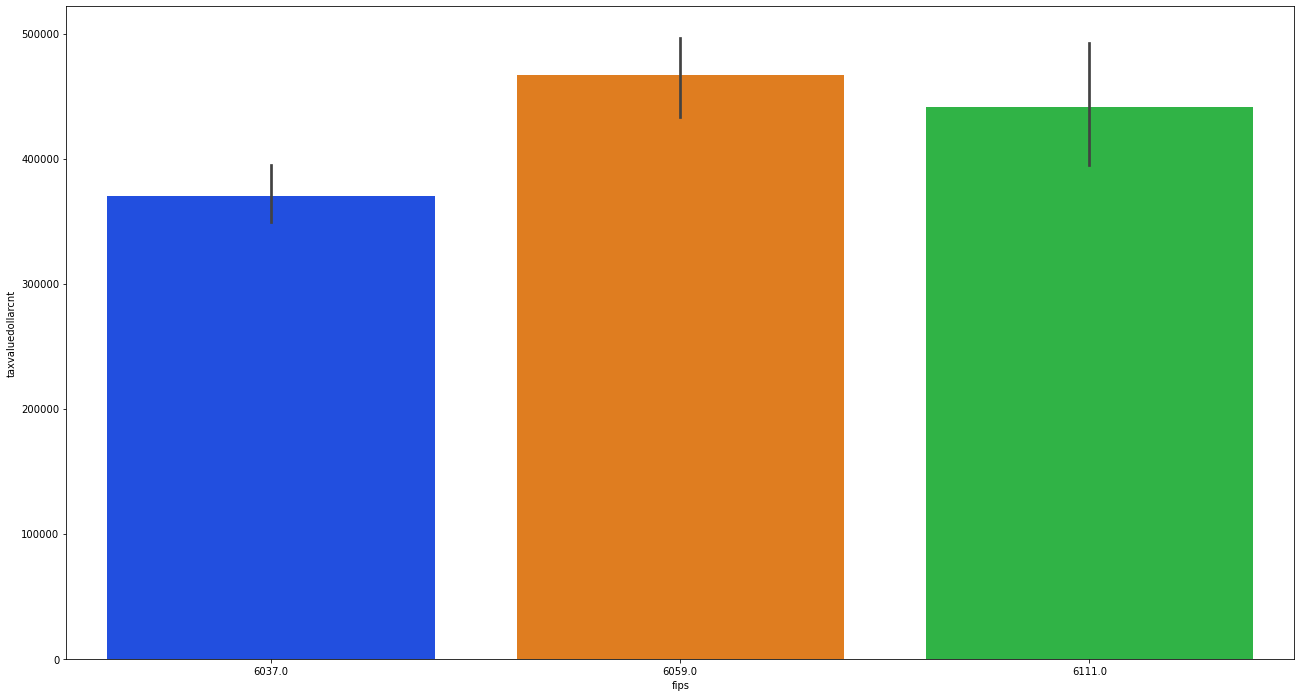

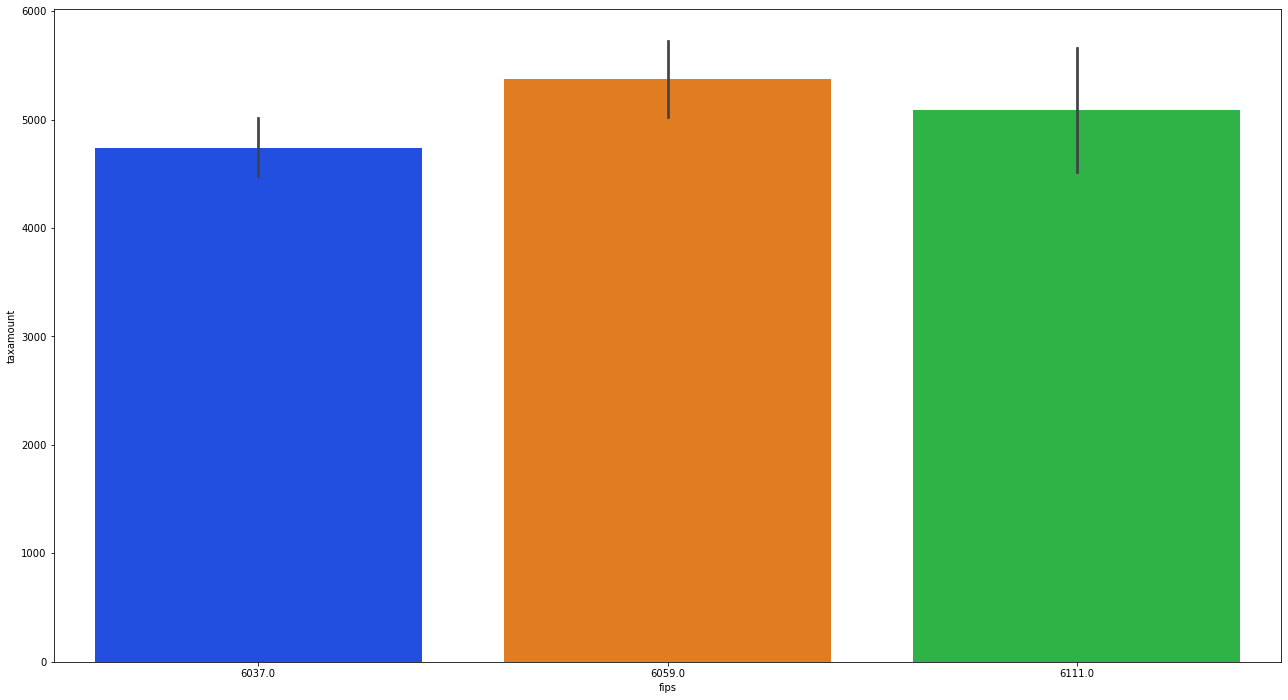

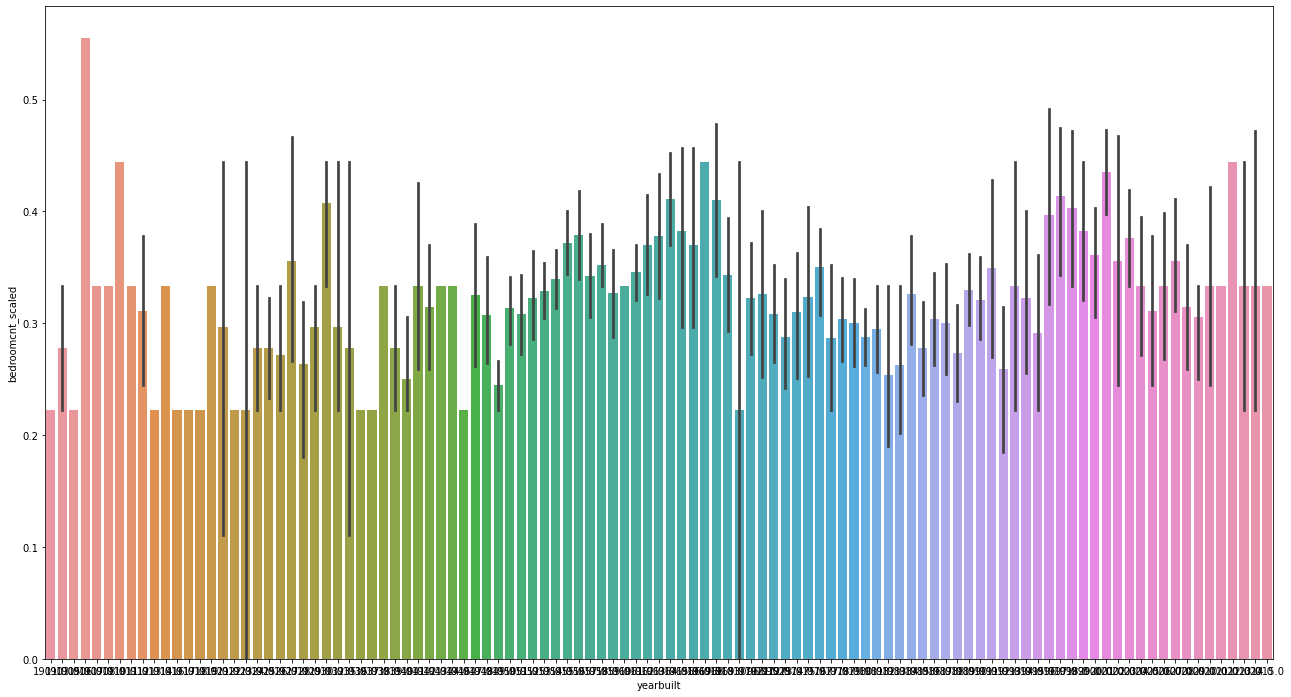

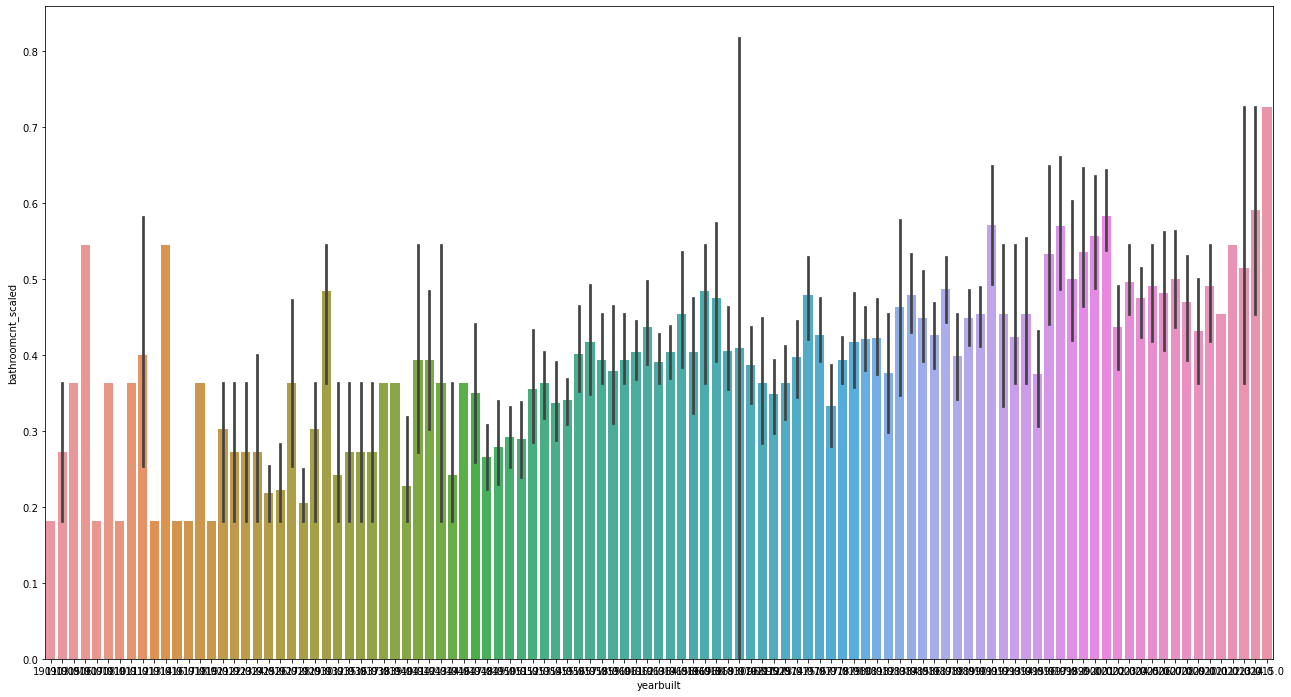

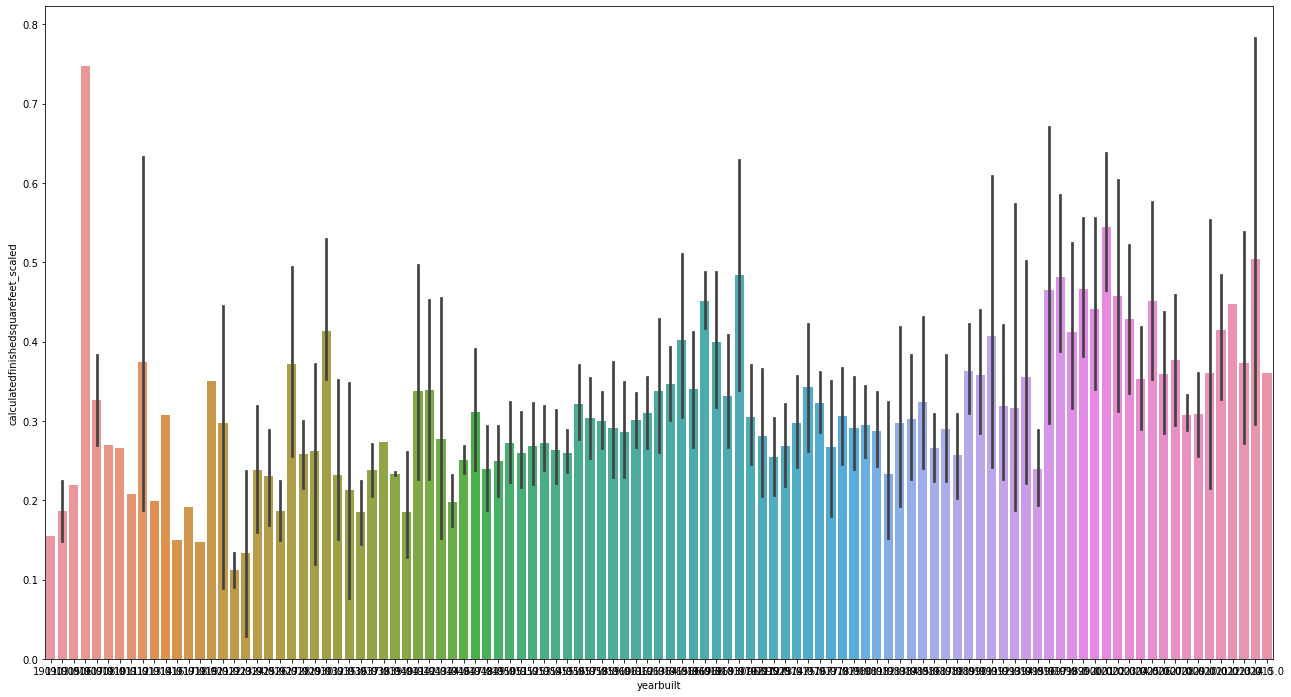

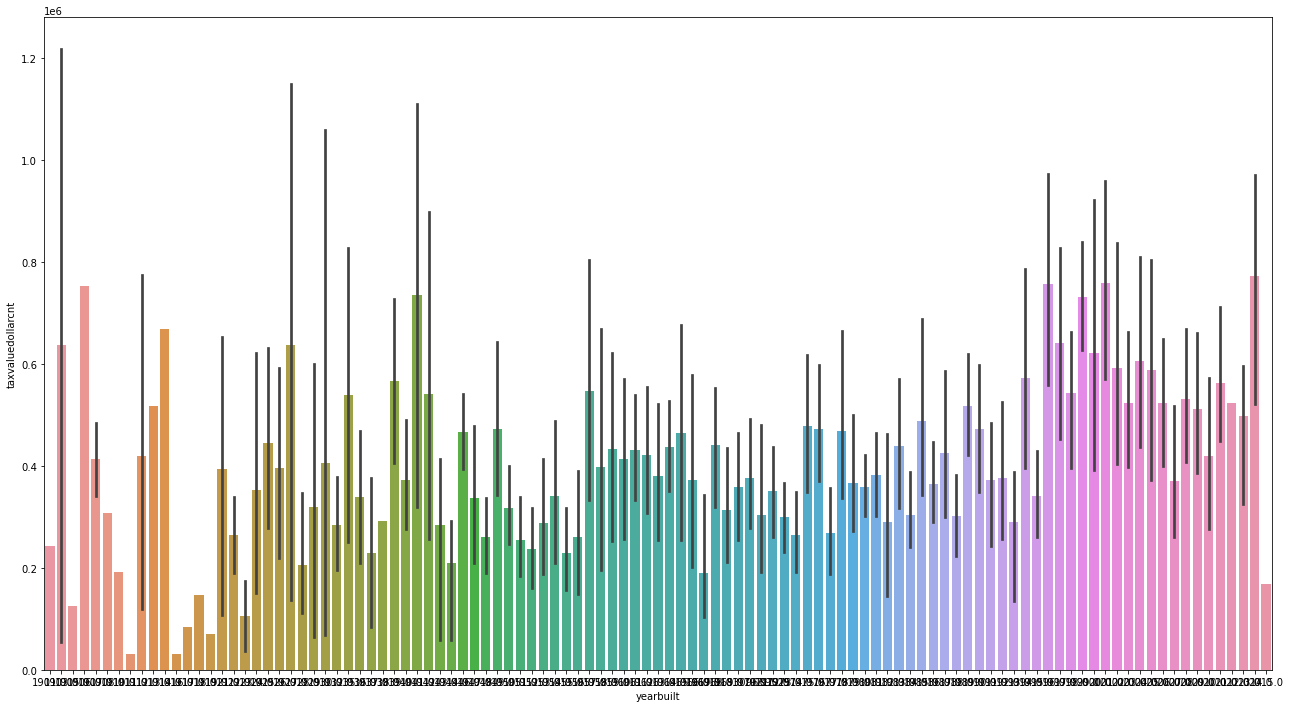

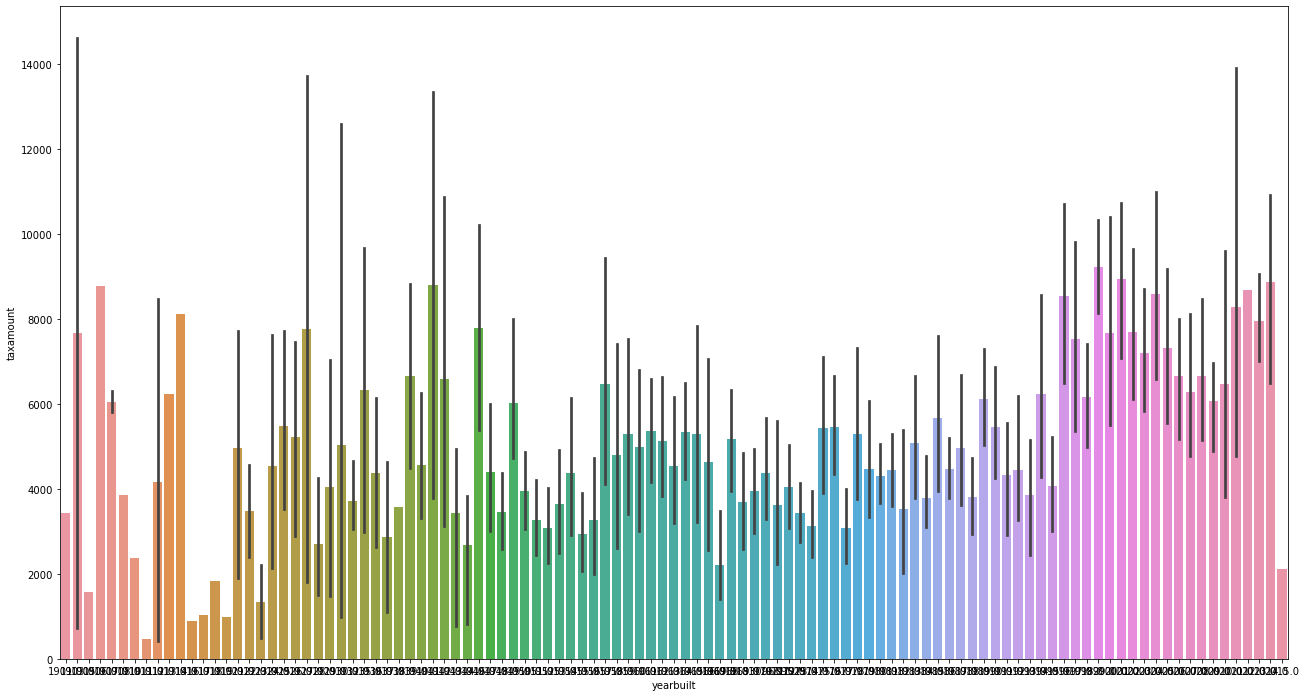

In [41]:
plot_categorical_and_continuous_vars(train_scaled.sample(1000), categorical, continuous)

## Initial Hypotheses

For the following hypotheses, we will set our alpha value, $\alpha$, equal to $0.05$.

#### Correlation between square feet and home value

$H_0$: There is no significant correlation between calculated finished square feet and tax value. 

$H_a$: There is a significant correlation between calculated finished square feet and tax value. 

In [54]:
test_results = stats.pearsonr(train.taxvaluedollarcnt, train.calculatedfinishedsquarefeet)
test_results

(0.5376187668263325, 0.0)

Because our p is less than 0.05, we reject our null hypothesis, and we conclude that there is a significant correlation between square feet and the value of the home.

In [49]:
los_angeles = train[train.fips == 6037.0]
orange = train[train.fips == 6059.0]
ventura = train[train.fips == 6111.0]

#### Los Angeles County vs. Orange County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes in either Ventura County (FIPS code $6111$).

In [48]:
test_results = stats.ttest_ind(los_angeles.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=-9.544208120078348, pvalue=1.5215905269899356e-21)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Los Angeles vs. Orange County.

#### Los Angeles County vs. Ventura County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes in either Ventura County (FIPS code $6111$).

In [50]:
test_results = stats.ttest_ind(los_angeles.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=-9.544208120078348, pvalue=1.5215905269899356e-21)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Los Angeles vs. Ventura County.

#### Orange County vs. Ventura County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Orange County (FIPS code $6059$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Orange County (FIPS code $6059$) and homes in either Ventura County (FIPS code $6111$).

In [51]:
test_results = stats.ttest_ind(orange.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=4.760407183189226, pvalue=1.9568642508081846e-06)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Orange vs. Ventura County.

## Linear Regression

In [80]:
from evaluate import plot_residuals
from evaluate import regression_errors
from evaluate import baseline_mean_errors
from evaluate import better_than_baseline

### Create a Baseline 

In [70]:
baseline = train_scaled.taxvaluedollarcnt.mean()
baseline

408516.37214890344

In [72]:
#baseline is mean of the dependent variable
train_scaled['baseline'] = train_scaled.taxvaluedollarcnt.mean()
train_scaled.head()

,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled,baseline
8266,286663.0,2009.0,5219.87,6037.0,0.374276,0.444444,0.363636,408516.372149
18949,64609.0,1978.0,803.16,6111.0,0.226928,0.222222,0.454545,408516.372149
22247,210212.0,1987.0,3411.70,6037.0,0.315872,0.444444,0.545455,408516.372149
7526,237037.0,1992.0,2984.05,6037.0,0.321890,0.222222,0.545455,408516.372149
17592,1094525.0,2000.0,13409.66,6111.0,0.823005,0.444444,0.818182,408516.372149


### Fit the model

In [74]:
#Create the model object
lm_squarefeet = LinearRegression(normalize=True)

# fit the model to training data
lm_squarefeet.fit(train_scaled[['calculatedfinishedsquarefeet_scaled']], train_scaled.taxvaluedollarcnt)

LinearRegression(normalize=True)

### Make prediction

In [76]:
train_scaled['yhat'] = lm_squarefeet.predict(train_scaled[['calculatedfinishedsquarefeet_scaled']])

train_scaled.head()

,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled,baseline,yhat
8266,286663.0,2009.0,5219.87,6037.0,0.374276,0.444444,0.363636,408516.372149,463640.685857
18949,64609.0,1978.0,803.16,6111.0,0.226928,0.222222,0.454545,408516.372149,321108.126879
22247,210212.0,1987.0,3411.70,6037.0,0.315872,0.444444,0.545455,408516.372149,407145.178365
7526,237037.0,1992.0,2984.05,6037.0,0.321890,0.222222,0.545455,408516.372149,412967.234480
17592,1094525.0,2000.0,13409.66,6111.0,0.823005,0.444444,0.818182,408516.372149,897707.314030


<AxesSubplot:xlabel='calculatedfinishedsquarefeet_scaled', ylabel='taxvaluedollarcnt'>

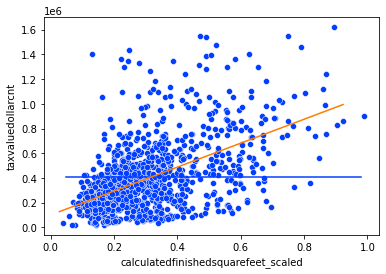

In [78]:
sns.scatterplot(x = "calculatedfinishedsquarefeet_scaled", y = "taxvaluedollarcnt", data = train_scaled.sample(1000))
sns.lineplot(x = 'calculatedfinishedsquarefeet_scaled', y = 'baseline', data = train_scaled.sample(1000))
sns.lineplot(x = 'calculatedfinishedsquarefeet_scaled', y = 'yhat', data = train_scaled.sample(1000))

### Compute the residuals

In [79]:
train_scaled['residual'] = train_scaled['taxvaluedollarcnt'] - train_scaled['yhat']
train_scaled['residual_baseline'] = train_scaled['taxvaluedollarcnt'] - train_scaled['baseline']
train_scaled.head()

,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled,baseline,yhat,residual,residual_baseline
8266,286663.0,2009.0,5219.87,6037.0,0.374276,0.444444,0.363636,408516.372149,463640.685857,-176977.685857,-121853.372149
18949,64609.0,1978.0,803.16,6111.0,0.226928,0.222222,0.454545,408516.372149,321108.126879,-256499.126879,-343907.372149
22247,210212.0,1987.0,3411.70,6037.0,0.315872,0.444444,0.545455,408516.372149,407145.178365,-196933.178365,-198304.372149
7526,237037.0,1992.0,2984.05,6037.0,0.321890,0.222222,0.545455,408516.372149,412967.234480,-175930.234480,-171479.372149
17592,1094525.0,2000.0,13409.66,6111.0,0.823005,0.444444,0.818182,408516.372149,897707.314030,196817.685970,686008.627851


### Evaluate Functions

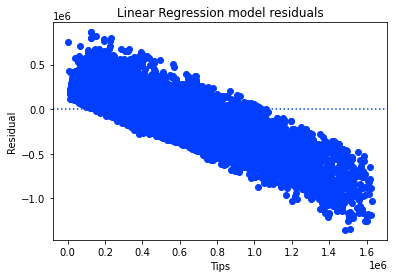

In [84]:
plot_residuals(train_scaled.taxvaluedollarcnt, train_scaled.yhat)

In [85]:
regression_errors(train_scaled.taxvaluedollarcnt, train_scaled.yhat)

ESS 666719985747260.1
MSE 57270523011.87577
SSE 1639998696968074.5
TSS 2306718682715334.5
RMSE 239312.60520891033


In [87]:
baseline_mean_errors(train_scaled.taxvaluedollarcnt)

MSE baseline 80553103880.26733
SSE baseline 2306718682715335.5
RMSE baseline 283818.78704600816


In [88]:
better_than_baseline(train_scaled.taxvaluedollarcnt, train_scaled.yhat)

The mode performs better than baseline.


## Feature Engineering

In [89]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28636 entries, 8266 to 3091
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   taxvaluedollarcnt                    28636 non-null  float64
 1   yearbuilt                            28636 non-null  float64
 2   taxamount                            28636 non-null  float64
 3   fips                                 28636 non-null  float64
 4   calculatedfinishedsquarefeet_scaled  28636 non-null  float64
 5   bedroomcnt_scaled                    28636 non-null  float64
 6   bathroomcnt_scaled                   28636 non-null  float64
 7   baseline                             28636 non-null  float64
 8   yhat                                 28636 non-null  float64
 9   residual                             28636 non-null  float64
 10  residual_baseline                    28636 non-null  float64
dtypes: float64(11)
memory usag

In [90]:
X_train = train_scaled[['yearbuilt', 'fips', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
y_train = train_scaled.taxvaluedollarcnt

### Select K Best

In [97]:
# Create model
kbest_1 = SelectKBest(f_regression, k=1)
#Fit the model
kbest_1.fit(X_train, y_train)
X_train.columns[kbest.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bathroomcnt_scaled'], dtype='object')

In [99]:
# Create model
kbest_1 = SelectKBest(f_regression, k=1)
#Fit the model
kbest_1.fit(X_train, y_train)
X_train.columns[kbest_1.get_support()]

Index(['calculatedfinishedsquarefeet_scaled'], dtype='object')

In [100]:
# Create model
kbest_2 = SelectKBest(f_regression, k=2)
#Fit the model
kbest_2.fit(X_train, y_train)
X_train.columns[kbest_2.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bathroomcnt_scaled'], dtype='object')

In [104]:
# Create model
kbest_3 = SelectKBest(f_regression, k=3)
#Fit the model
kbest_3.fit(X_train, y_train)
X_train.columns[kbest_3.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled',
       'bathroomcnt_scaled'],
      dtype='object')

### Recursive Feature Elimination

In [101]:
rfe_1 = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe_1.fit(X_train, y_train)
X_train.columns[rfe_1.get_support()]

Index(['calculatedfinishedsquarefeet_scaled'], dtype='object')

In [102]:
rfe_2 = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe_2.fit(X_train, y_train)
X_train.columns[rfe_2.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled'], dtype='object')

In [103]:
rfe_3 = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe_3.fit(X_train, y_train)
X_train.columns[rfe_3.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled',
       'bathroomcnt_scaled'],
      dtype='object')